**Customer Churn Analysis**

**Pipeline Summary**
1. Data Loading & Initial Exploration  
2. Data Cleaning & Preprocessing  
3. Exploratory Data Analysis (EDA)  
4. Feature Engineering & Encoding  
5. Model Building & Evaluation  
6. Hyperparameter Tuning  
7. Risk Tier Segmentation  
8. Key Insights

**Data Loading & Initial Exploration**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
print("Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Shape: (7043, 21)

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Data Cleaning & Preprocessing**

In [4]:
print("Column names and data types:")
print(df.dtypes)


Column names and data types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [5]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
print("\nChurn distribution:")
print(df['Churn'].value_counts())


Churn distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.dropna(subset=['TotalCharges'], inplace=True)

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df.drop(columns=['customerID'], inplace=True)

print("Cleaned shape:", df.shape)
print("\nChurn column now looks like:")
print(df['Churn'].value_counts())

Cleaned shape: (7032, 20)

Churn column now looks like:
Churn
0    5163
1    1869
Name: count, dtype: int64


**Exploratory Data Analysis (EDA)**

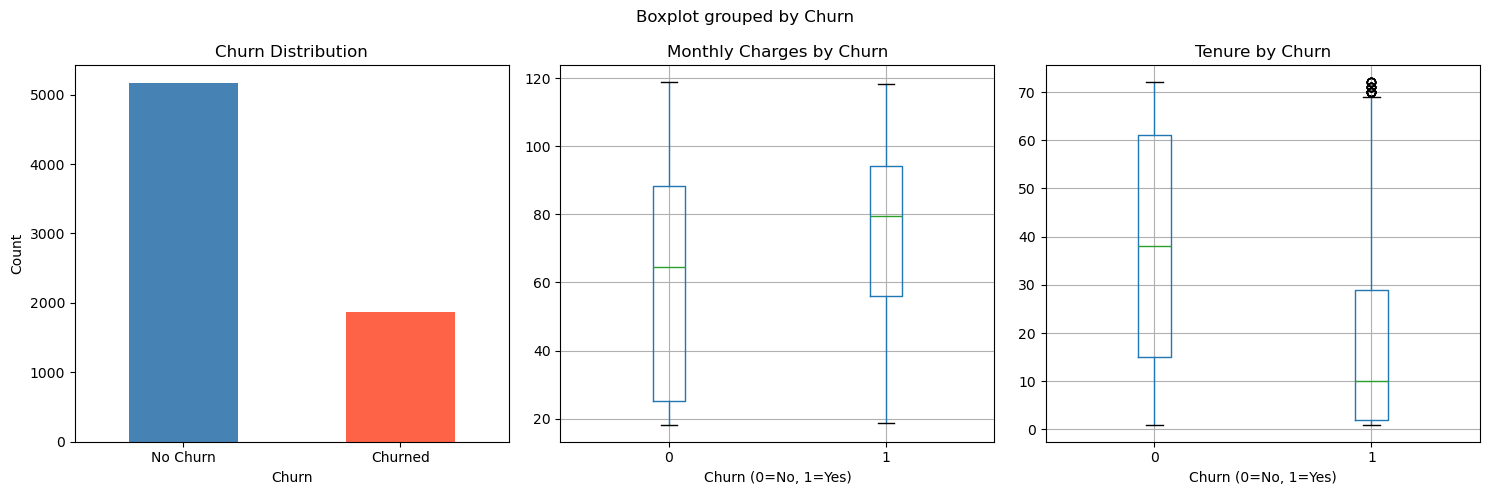

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Chart 1: Churn distribution
df['Churn'].value_counts().plot(kind='bar', ax=axes[0], color=['steelblue', 'tomato'])
axes[0].set_title('Churn Distribution')
axes[0].set_xticklabels(['No Churn', 'Churned'], rotation=0)
axes[0].set_ylabel('Count')

# Chart 2: Monthly Charges vs Churn
df.boxplot(column='MonthlyCharges', by='Churn', ax=axes[1])
axes[1].set_title('Monthly Charges by Churn')
axes[1].set_xlabel('Churn (0=No, 1=Yes)')

# Chart 3: Tenure vs Churn
df.boxplot(column='tenure', by='Churn', ax=axes[2])
axes[2].set_title('Tenure by Churn')
axes[2].set_xlabel('Churn (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

**Feature Engineering & Encoding**

In [9]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Shape after encoding:", df_encoded.shape)
print("\nFirst 3 rows:")
df_encoded.head(3)


Shape after encoding: (7032, 31)

First 3 rows:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True


**Model Building**

In [10]:

# Separate features (X) and target (y)
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# Model Split - 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("\nChurn rate in training set:", round(y_train.mean() * 100, 2), "%")
print("Churn rate in test set:", round(y_test.mean() * 100, 2), "%")

Training set size: (5625, 30)
Test set size: (1407, 30)

Churn rate in training set: 26.58 %
Churn rate in test set: 26.58 %


In [11]:
# Model 1: Logistic Regression with class_weight='balanced' (cost-sensitive learning)
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Model 2: Random Forest with class_weight='balanced' (cost-sensitive learning)
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("=== Logistic Regression ===")
print(classification_report(y_test, lr_preds))
print("AUC Score:", round(roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1]), 3))

print("\n=== Random Forest ===")
print(classification_report(y_test, rf_preds))
print("AUC Score:", round(roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]), 3))

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407

AUC Score: 0.836

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

AUC Score: 0.818


**Improving Logistic Regression with Feature Scaling**

In [12]:
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

lr_pipeline.fit(X_train, y_train)
lr_preds2 = lr_pipeline.predict(X_test)

print("=== Improved Logistic Regression ===")
print(classification_report(y_test, lr_preds2))
print("AUC Score:", round(roc_auc_score(y_test, lr_pipeline.predict_proba(X_test)[:,1]), 3))

=== Improved Logistic Regression ===
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407

AUC Score: 0.835


**Confusion Matrix Visualisation**

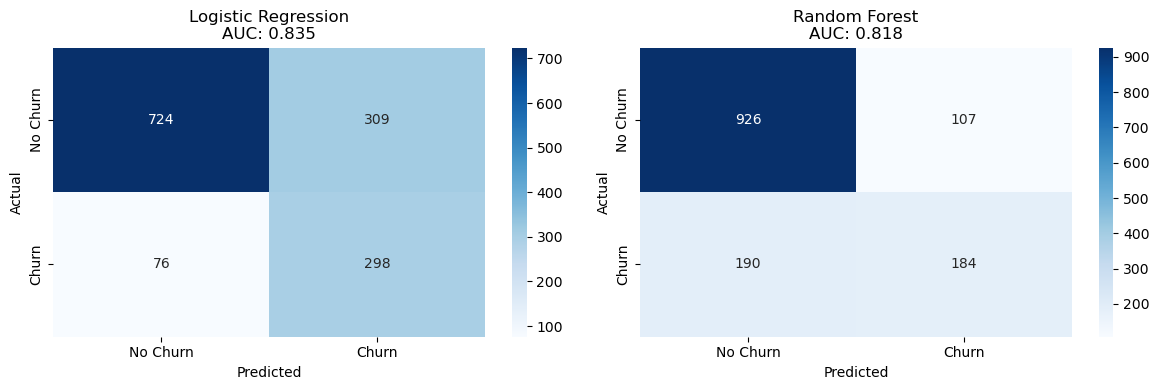

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

models = {
    'Logistic Regression': (lr_preds2, axes[0]),
    'Random Forest': (rf_preds, axes[1])
}

for name, (preds, ax) in models.items():
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'])
    ax.set_title(f'{name}\nAUC: {"0.835" if "Logistic" in name else "0.818"}')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

plt.tight_layout()
plt.show()

**Feature Importance (Random Forest)**

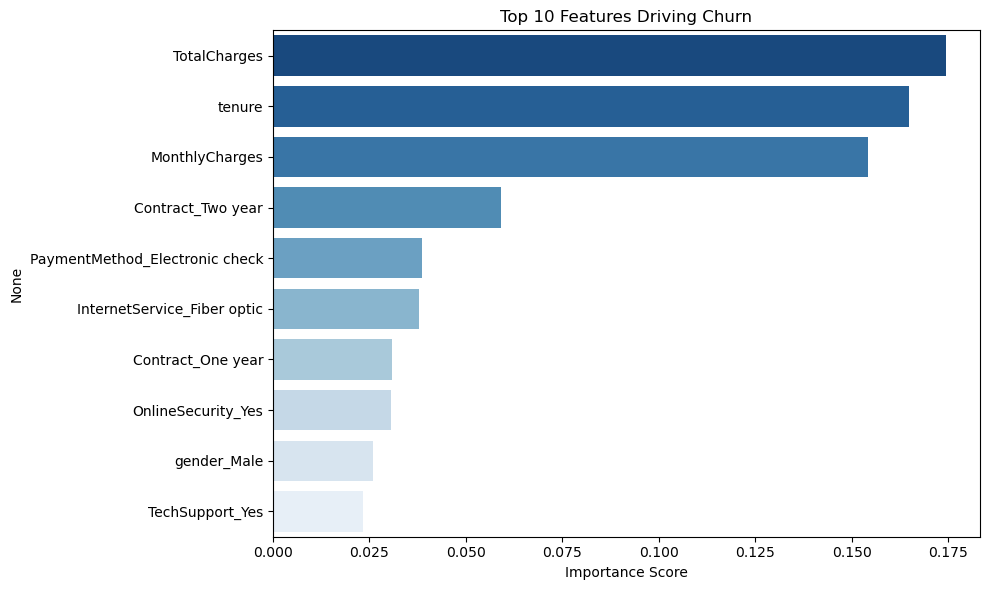

In [14]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='Blues_r')
plt.title('Top 10 Features Driving Churn')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

**Hyperparameter Tuning**

In [15]:
# Random Forest

# Define parameters 
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}


rf_tuned = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid,
    cv=5,
    scoring='recall',  
    n_jobs=-1
)

rf_tuned.fit(X_train, y_train)
best_rf_preds = rf_tuned.best_estimator_.predict(X_test)

print("Best parameters found:", rf_tuned.best_params_)
print("\n=== Tuned Random Forest ===")
print(classification_report(y_test, best_rf_preds))
print("AUC Score:", round(roc_auc_score(y_test, rf_tuned.best_estimator_.predict_proba(X_test)[:,1]), 3))

Best parameters found: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}

=== Tuned Random Forest ===
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.50      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407

AUC Score: 0.836


In [16]:
# Logistic Regression 

param_grid_lr = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__solver': ['lbfgs', 'liblinear']
}

lr_tuned_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

lr_grid = GridSearchCV(
    lr_tuned_pipeline,
    param_grid_lr,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

lr_grid.fit(X_train, y_train)
lr_tuned_preds = lr_grid.predict(X_test)

print("Best parameters found:", lr_grid.best_params_)
print("\n=== Tuned Logistic Regression ===")
print(classification_report(y_test, lr_tuned_preds))
print("AUC Score:", round(roc_auc_score(y_test, lr_grid.predict_proba(X_test)[:,1]), 3))

Best parameters found: {'model__C': 0.01, 'model__solver': 'liblinear'}

=== Tuned Logistic Regression ===
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407

AUC Score: 0.833


**Final Model Comparison**

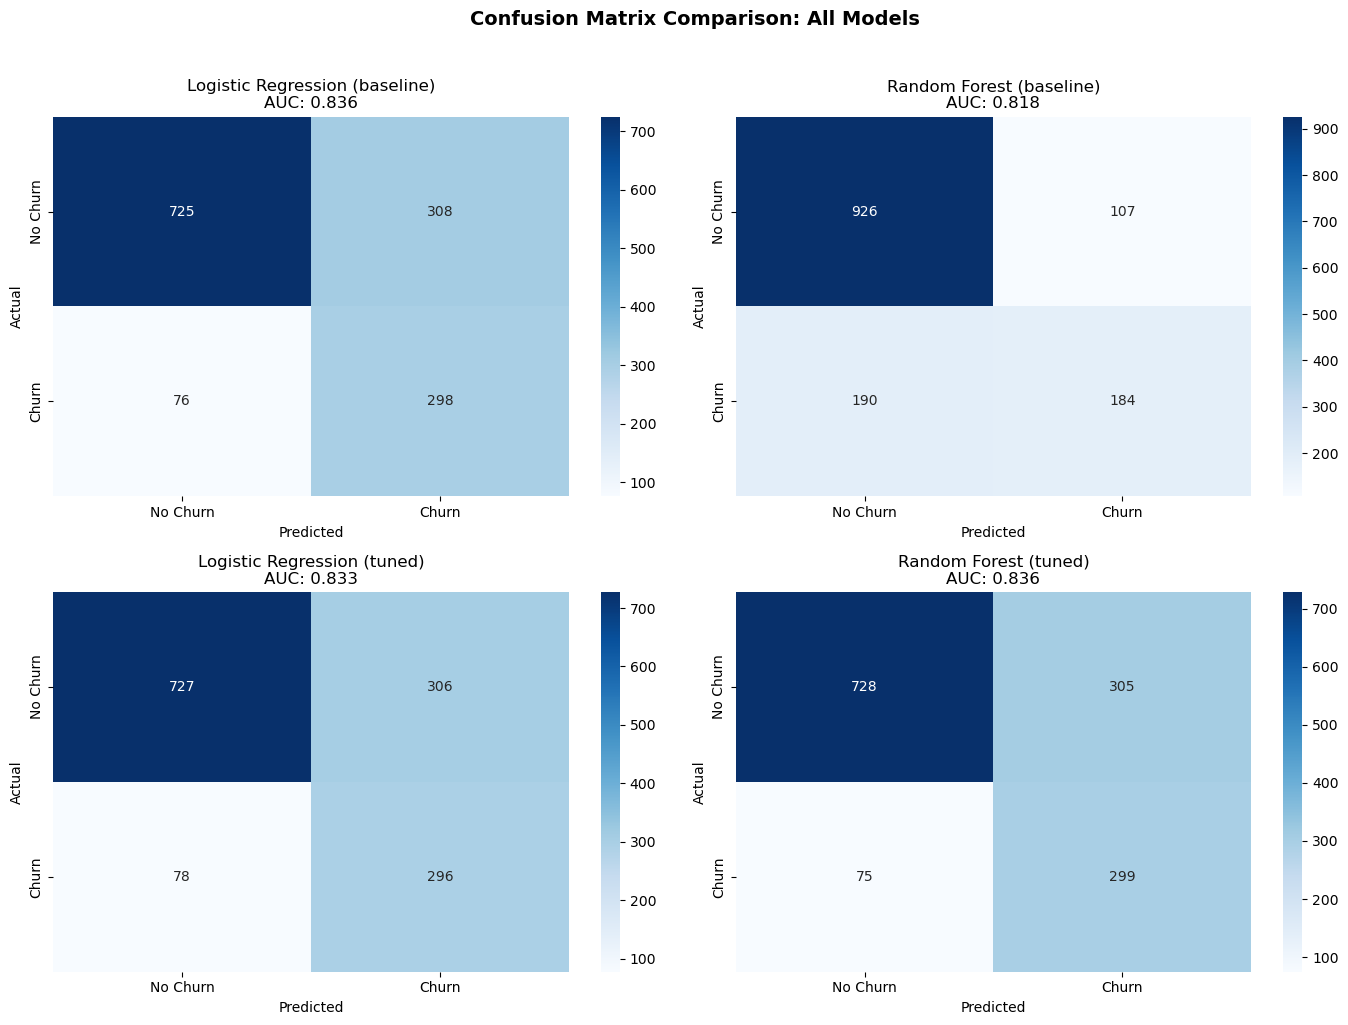

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

models_final = [
    ('Logistic Regression (baseline)', lr_preds, axes[0, 0]),
    ('Random Forest (baseline)', rf_preds, axes[0, 1]),
    ('Logistic Regression (tuned)', lr_tuned_preds, axes[1, 0]),
    ('Random Forest (tuned)', best_rf_preds, axes[1, 1]),
]

aucs = ['0.836', '0.818', '0.833', '0.836']

for i, (name, preds, ax) in enumerate(models_final):
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'])
    ax.set_title(f'{name}\nAUC: {aucs[i]}')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

plt.suptitle('Confusion Matrix Comparison: All Models', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

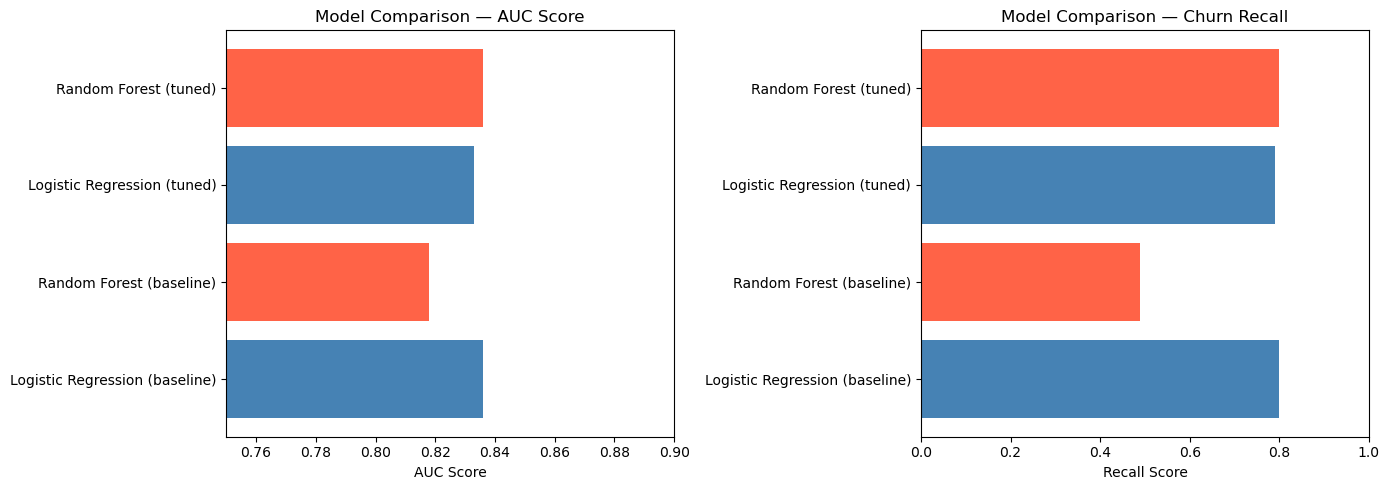


Final Recommendation:
Tuned Random Forest selected — AUC 0.836, 80% churn recall after hyperparameter tuning.
Baseline Random Forest improved from 49% to 80% recall through GridSearchCV optimisation.


In [18]:


results = {
    'Logistic Regression (baseline)': 0.836,
    'Random Forest (baseline)': 0.818,
    'Logistic Regression (tuned)': 0.833,
    'Random Forest (tuned)': 0.836
}

recall_results = {
    'Logistic Regression (baseline)': 0.80,
    'Random Forest (baseline)': 0.49,
    'Logistic Regression (tuned)': 0.79,
    'Random Forest (tuned)': 0.80
}

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# AUC comparison
axes[0].barh(list(results.keys()), list(results.values()), color=['steelblue', 'tomato', 'steelblue', 'tomato'])
axes[0].set_title('Model Comparison — AUC Score')
axes[0].set_xlim(0.75, 0.90)
axes[0].set_xlabel('AUC Score')

# Recall comparison
axes[1].barh(list(recall_results.keys()), list(recall_results.values()), color=['steelblue', 'tomato', 'steelblue', 'tomato'])
axes[1].set_title('Model Comparison — Churn Recall')
axes[1].set_xlim(0, 1)
axes[1].set_xlabel('Recall Score')

plt.tight_layout()
plt.show()

print("\nFinal Recommendation:")
print("Tuned Random Forest selected — AUC 0.836, 80% churn recall after hyperparameter tuning.")
print("Baseline Random Forest improved from 49% to 80% recall through GridSearchCV optimisation.")

**Feature Importance - Tuned Random Forest**

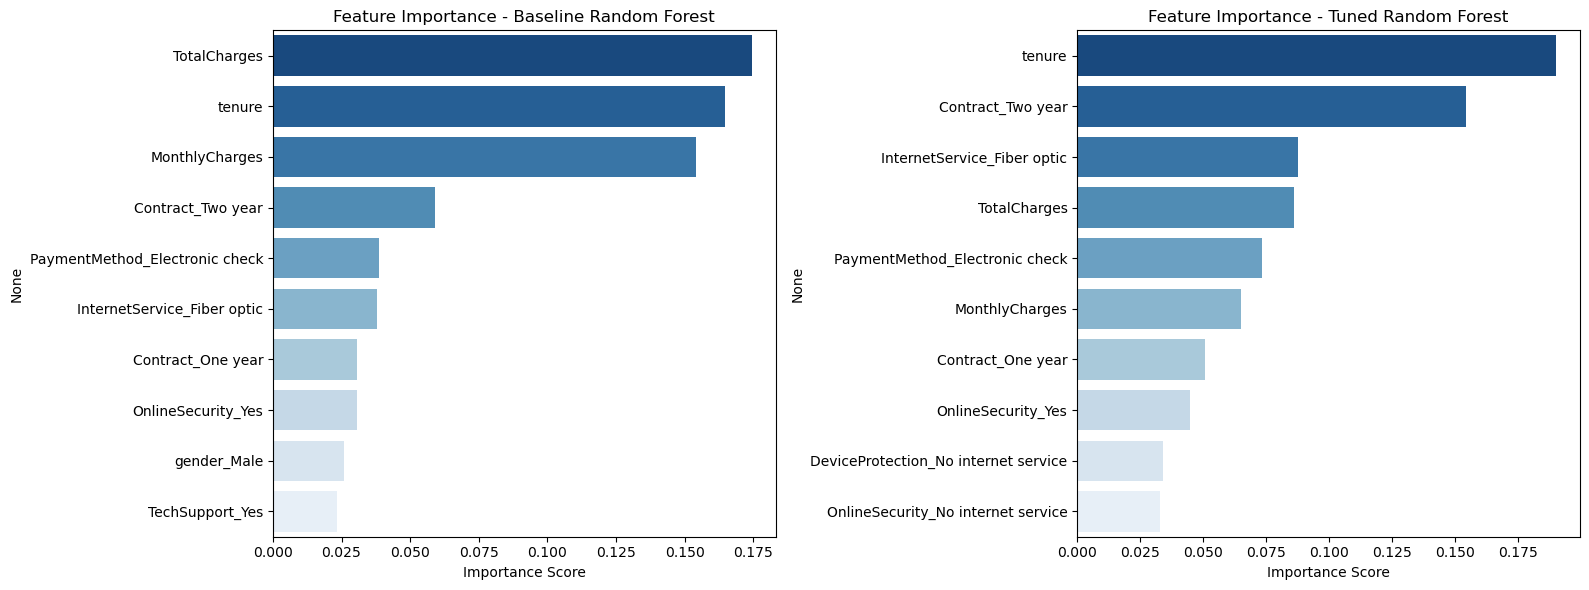

In [19]:

importances_tuned = pd.Series(
    rf_tuned.best_estimator_.feature_importances_, 
    index=X.columns
)
top_features_tuned = importances_tuned.sort_values(ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Original
sns.barplot(x=top_features.values, y=top_features.index, palette='Blues_r', ax=axes[0])
axes[0].set_title('Feature Importance - Baseline Random Forest')
axes[0].set_xlabel('Importance Score')

# Tuned
sns.barplot(x=top_features_tuned.values, y=top_features_tuned.index, palette='Blues_r', ax=axes[1])
axes[1].set_title('Feature Importance - Tuned Random Forest')
axes[1].set_xlabel('Importance Score')

plt.tight_layout()
plt.show()

**Scoring Customers - Who is Most at Risk?**

In [20]:

# Churn probabilities for every customer in the test set
churn_probabilities = rf_tuned.best_estimator_.predict_proba(X_test)[:, 1]

# Create a results dataframe
results_df = X_test.copy()
results_df['Churn_Probability'] = churn_probabilities
results_df['Actual_Churn'] = y_test.values

# Segment into risk tiers
def risk_tier(prob):
    if prob >= 0.7:
        return 'High Risk'
    elif prob >= 0.4:
        return 'Medium Risk'
    else:
        return 'Low Risk'

results_df['Risk_Tier'] = results_df['Churn_Probability'].apply(risk_tier)

# Summary of risk tiers
print("Risk Tier Distribution:")
print(results_df['Risk_Tier'].value_counts())

print("\nChurn rate within each tier:")
print(results_df.groupby('Risk_Tier')['Actual_Churn'].mean().round(2))

Risk Tier Distribution:
Risk_Tier
Low Risk       646
Medium Risk    503
High Risk      258
Name: count, dtype: int64

Churn rate within each tier:
Risk_Tier
High Risk      0.67
Low Risk       0.06
Medium Risk    0.32
Name: Actual_Churn, dtype: float64


**Visualise Risk Tier Distribution and Churn Rates**

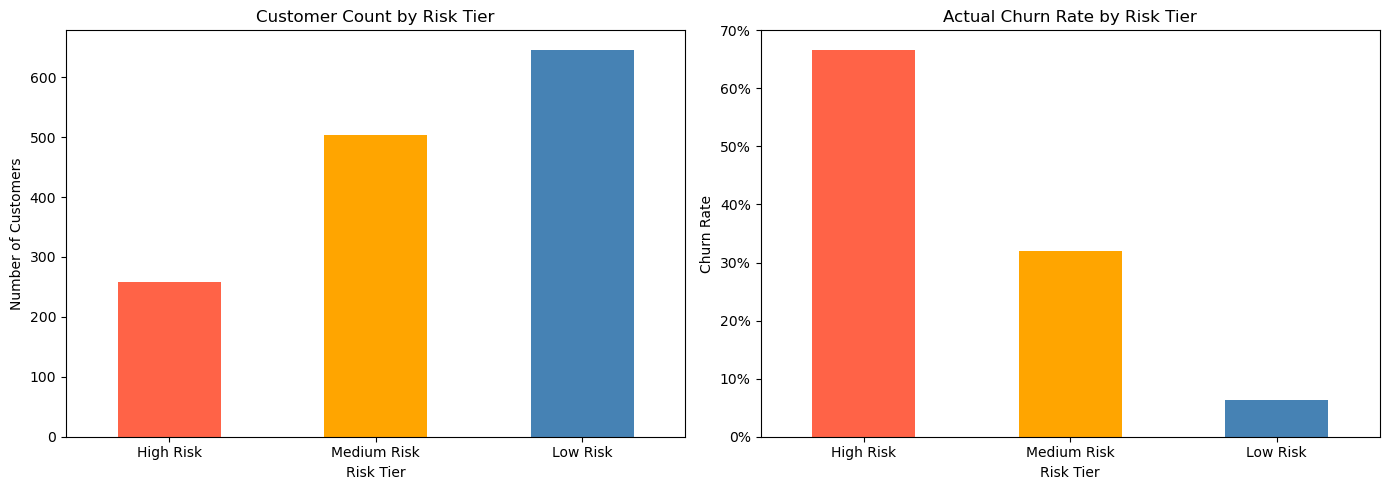

Top 10 Highest Risk Customers:
      Churn_Probability  Risk_Tier  Actual_Churn
4585               0.85  High Risk             1
2397               0.85  High Risk             1
2464               0.85  High Risk             1
642                0.85  High Risk             1
2607               0.85  High Risk             1
1731               0.85  High Risk             1
6240               0.85  High Risk             1
3380               0.85  High Risk             1
6633               0.84  High Risk             1
2927               0.84  High Risk             0


In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Chart 1: How many customers in each tier
tier_counts = results_df['Risk_Tier'].value_counts()
colors = ['tomato', 'orange', 'steelblue']
tier_counts[['High Risk', 'Medium Risk', 'Low Risk']].plot(
    kind='bar', ax=axes[0], color=colors
)
axes[0].set_title('Customer Count by Risk Tier')
axes[0].set_xlabel('Risk Tier')
axes[0].set_ylabel('Number of Customers')
axes[0].tick_params(axis='x', rotation=0)

# Chart 2: Actual churn rate within each tier
churn_rates = results_df.groupby('Risk_Tier')['Actual_Churn'].mean()
churn_rates[['High Risk', 'Medium Risk', 'Low Risk']].plot(
    kind='bar', ax=axes[1], color=colors
)
axes[1].set_title('Actual Churn Rate by Risk Tier')
axes[1].set_xlabel('Risk Tier')
axes[1].set_ylabel('Churn Rate')
axes[1].tick_params(axis='x', rotation=0)
axes[1].yaxis.set_major_formatter(
    plt.FuncFormatter(lambda y, _: f'{y:.0%}')
)

plt.tight_layout()
plt.show()

# Top 10 highest risk customers
print("Top 10 Highest Risk Customers:")
top_risk = results_df.sort_values('Churn_Probability', ascending=False)[
    ['Churn_Probability', 'Risk_Tier', 'Actual_Churn']
].head(10)
print(top_risk.round(2))

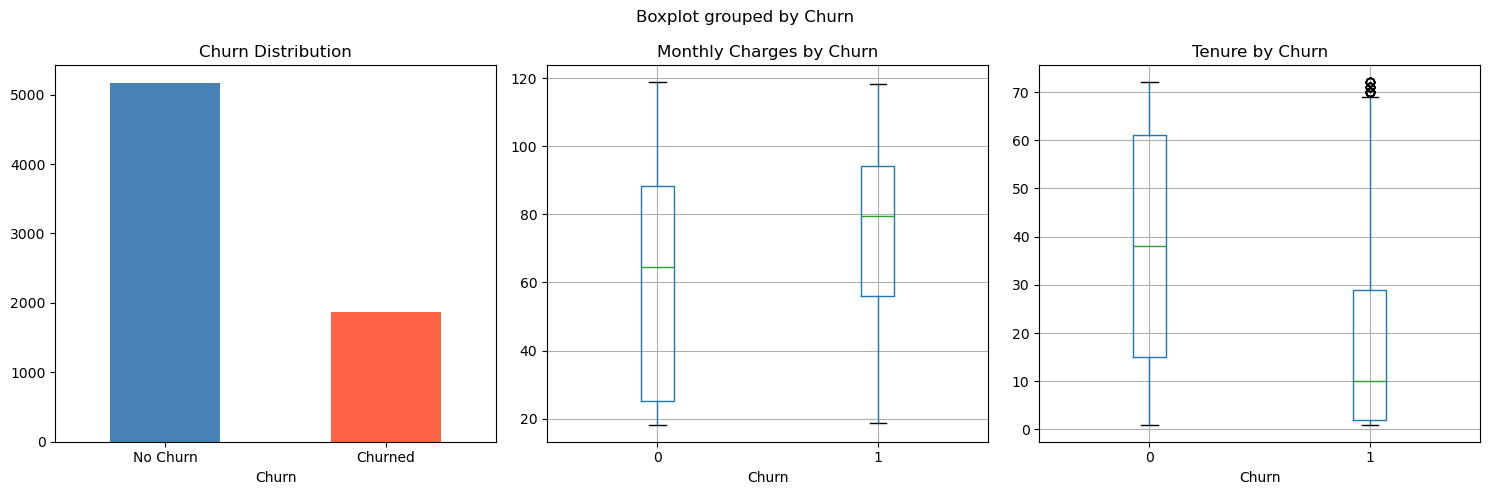

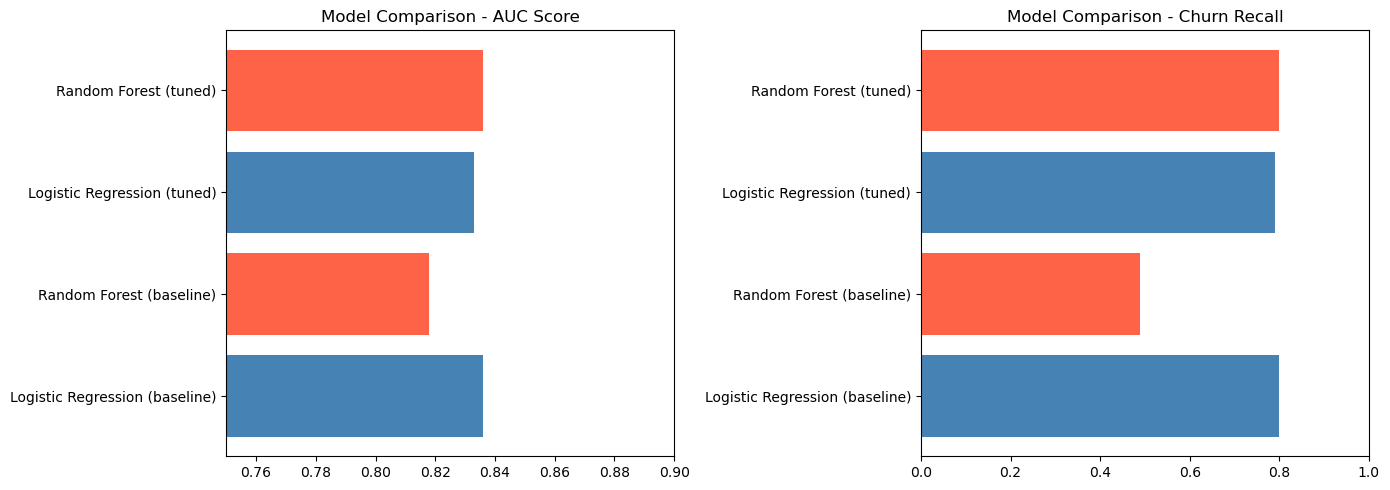

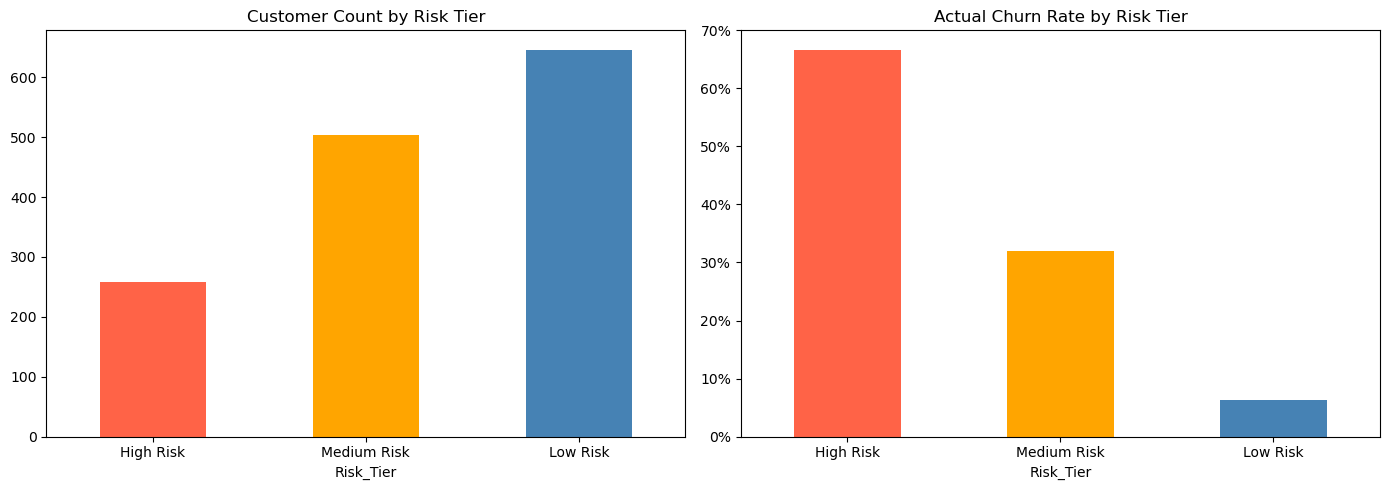

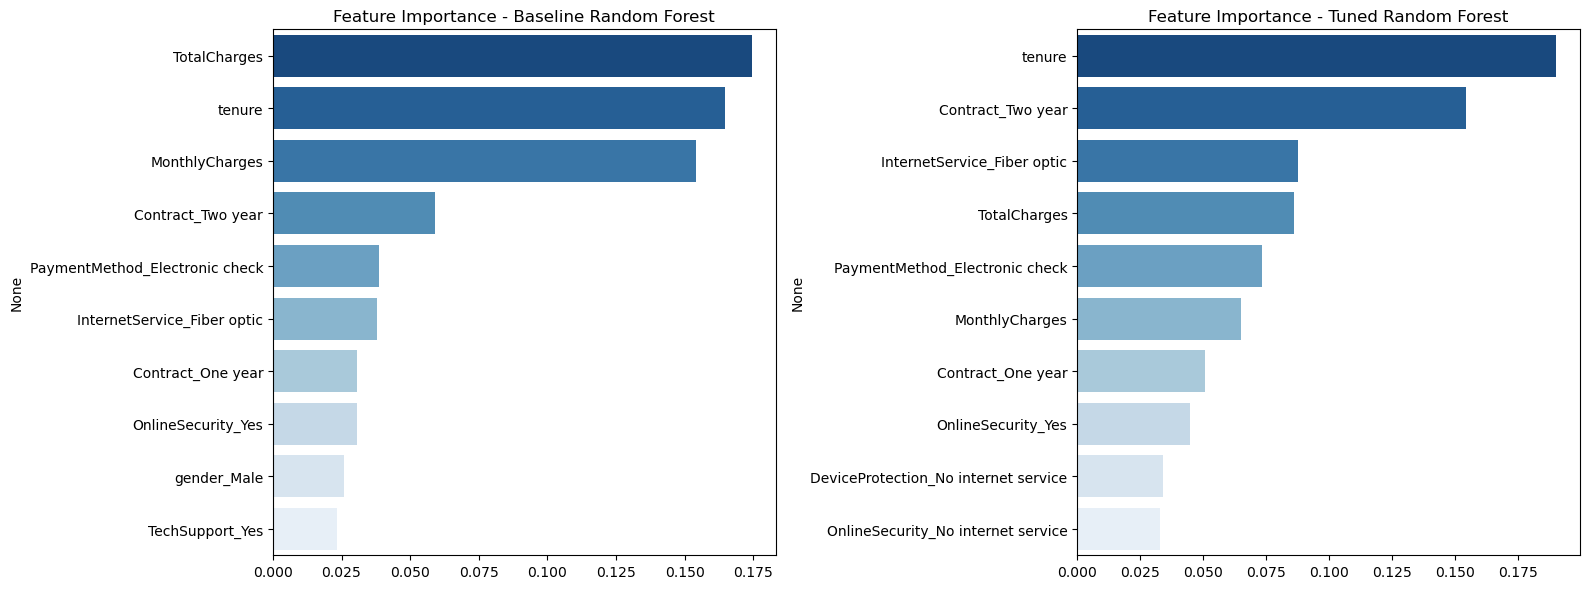

All images saved to images/ folder


In [22]:
os.makedirs('images', exist_ok=True)

# Chart 1: Churn Distribution & EDA
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
df['Churn'].value_counts().plot(kind='bar', ax=axes[0], color=['steelblue', 'tomato'])
axes[0].set_title('Churn Distribution')
axes[0].set_xticklabels(['No Churn', 'Churned'], rotation=0)
df.boxplot(column='MonthlyCharges', by='Churn', ax=axes[1])
axes[1].set_title('Monthly Charges by Churn')
df.boxplot(column='tenure', by='Churn', ax=axes[2])
axes[2].set_title('Tenure by Churn')
plt.tight_layout()
plt.savefig('images/eda_charts.png', dpi=150, bbox_inches='tight')
plt.show()

# Chart 2: Model Comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].barh(list(results.keys()), list(results.values()), color=['steelblue', 'tomato', 'steelblue', 'tomato'])
axes[0].set_title('Model Comparison - AUC Score')
axes[0].set_xlim(0.75, 0.90)
axes[1].barh(list(recall_results.keys()), list(recall_results.values()), color=['steelblue', 'tomato', 'steelblue', 'tomato'])
axes[1].set_title('Model Comparison - Churn Recall')
axes[1].set_xlim(0, 1)
plt.tight_layout()
plt.savefig('images/model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

# Chart 3: Risk Tier
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
tier_counts[['High Risk', 'Medium Risk', 'Low Risk']].plot(kind='bar', ax=axes[0], color=['tomato', 'orange', 'steelblue'])
axes[0].set_title('Customer Count by Risk Tier')
axes[0].tick_params(axis='x', rotation=0)
churn_rates[['High Risk', 'Medium Risk', 'Low Risk']].plot(kind='bar', ax=axes[1], color=['tomato', 'orange', 'steelblue'])
axes[1].set_title('Actual Churn Rate by Risk Tier')
axes[1].tick_params(axis='x', rotation=0)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
plt.tight_layout()
plt.savefig('images/risk_tiers.png', dpi=150, bbox_inches='tight')
plt.show()

# Chart 4: Feature Importance Comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='Blues_r', ax=axes[0])
axes[0].set_title('Feature Importance - Baseline Random Forest')
sns.barplot(x=top_features_tuned.values, y=top_features_tuned.index, palette='Blues_r', ax=axes[1])
axes[1].set_title('Feature Importance - Tuned Random Forest')
plt.tight_layout()
plt.savefig('images/feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()

print("All images saved to images/ folder")